In [13]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [6]:
dev1 =  qml.device("default.qubit", wires=1)
@qml.qnode(dev1, interface="autograd")
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    return qml.expval(qml.PauliZ(0))
print(circuit([np.pi/4, np.pi/4]))

0.49999999999999994


In [12]:
dcircuit = qml.grad(circuit, argnum=0)
print(dcircuit([np.pi/2, np.pi/2]))

[array(0.), array(0.)]


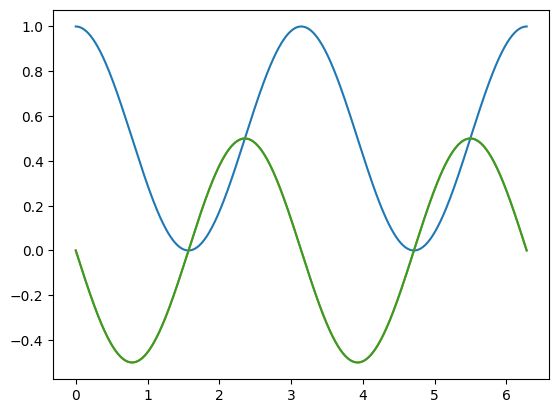

In [16]:
x = np.linspace(0,2*np.pi, 1000)
plt.plot(x, circuit([x,x]))
plt.plot(x, [dcircuit([i,i]) for i in x])

In [ ]:
@qml.qnode(dev1, interface="autograd")
def circuit2(phi1, phi2):
    qml.RX(phi1, wires=0)
    qml.RZ(phi2, wires=0)
    return qml.expval(qml.PauliZ(0))
dcircuit = qml.grad(circuit2, argnum=[0, 1])
#argnum defines after which param you build the gradient in respect to

In [17]:
init_params = np.array([0.011, 0.012], requires_grad=True)
opt = qml.GradientDescentOptimizer(stepsize=0.4)
steps = 100
params = init_params
for i in range(steps):
    params = opt.step(circuit, params)
    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, circuit(params)))
print("Optimized rotation angles: {}".format(params))

Cost after step     5:  0.9961778
Cost after step    10:  0.8974944
Cost after step    15:  0.1440490
Cost after step    20: -0.1536720
Cost after step    25: -0.9152496
Cost after step    30: -0.9994046
Cost after step    35: -0.9999964
Cost after step    40: -1.0000000
Cost after step    45: -1.0000000
Cost after step    50: -1.0000000
Cost after step    55: -1.0000000
Cost after step    60: -1.0000000
Cost after step    65: -1.0000000
Cost after step    70: -1.0000000
Cost after step    75: -1.0000000
Cost after step    80: -1.0000000
Cost after step    85: -1.0000000
Cost after step    90: -1.0000000
Cost after step    95: -1.0000000
Cost after step   100: -1.0000000
Optimized rotation angles: [7.15266381e-18 3.14159265e+00]


In [19]:
np.random.seed(42)
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev, diff_method="parameter-shift", interface="autograd")
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RZ(params[2], wires=2)

    qml.broadcast(qml.CNOT, wires=[0, 1, 2], pattern="ring")

    qml.RX(params[3], wires=0)
    qml.RY(params[4], wires=1)
    qml.RZ(params[5], wires=2)

    qml.broadcast(qml.CNOT, wires=[0, 1, 2], pattern="ring")
    return qml.expval(qml.PauliY(0) @ qml.PauliZ(2))

Parameters: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
Expectation value: -0.11971365706871567


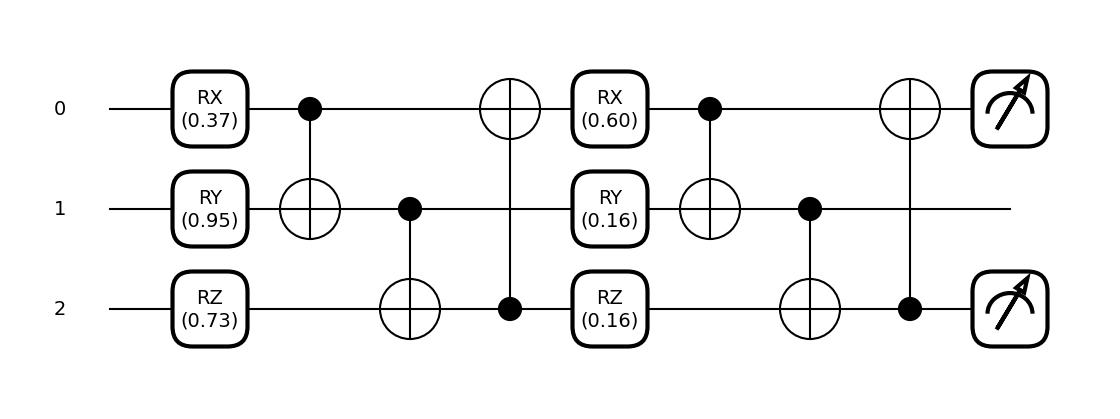

In [20]:
params = np.random.random([6], requires_grad=True)

print("Parameters:", params)
print("Expectation value:", circuit(params))
fig, ax = qml.draw_mpl(circuit, decimals=2)(params)
plt.show()